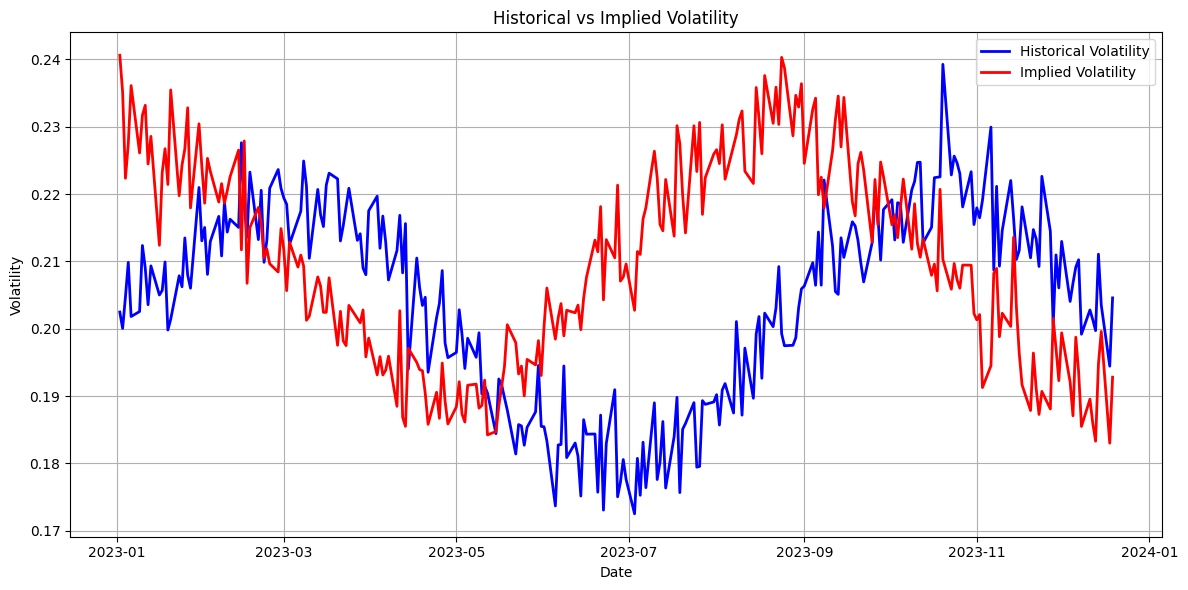

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_historical_volatility(prices, window=30):
    """
    Calculate the annualized historical volatility based on a rolling window.
    prices: A pandas Series of asset prices.
    window: The number of periods for the rolling window.
    """
    # Calculate log returns
    log_returns = np.log(prices / prices.shift(1))
    # Compute rolling standard deviation and annualize (assuming 252 trading days)
    volatility = log_returns.rolling(window=window).std() * np.sqrt(252)
    return volatility

def main():
    # Option 1: Load your data from a CSV file
    # Uncomment the lines below if you have a CSV file with columns "Date", "Historical Volatility", "Implied Volatility"
    # data = pd.read_csv('volatility_data.csv', parse_dates=['Date'])
    # dates = data['Date']
    # historical_vol = data['Historical Volatility']
    # implied_vol = data['Implied Volatility']

    # Option 2: Generate synthetic data for demonstration
    dates = pd.date_range(start='2023-01-01', periods=252, freq='B')  # 252 business days for one trading year
    np.random.seed(42)
    # Create synthetic historical volatility (e.g., around 20% with some oscillations and noise)
    historical_vol = 0.20 + 0.02 * np.sin(np.linspace(0, 3*np.pi, len(dates))) + np.random.normal(0, 0.005, len(dates))
    # Create synthetic implied volatility (e.g., around 21% with different oscillations and noise)
    implied_vol = 0.21 + 0.02 * np.cos(np.linspace(0, 3*np.pi, len(dates))) + np.random.normal(0, 0.005, len(dates))

    # Plot the volatilities
    plt.figure(figsize=(12, 6))
    plt.plot(dates, historical_vol, label='Historical Volatility', color='blue', linewidth=2)
    plt.plot(dates, implied_vol, label='Implied Volatility', color='red', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.title('Historical vs Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
